Here is the stat resource that will be helpful today: https://stats.idre.ucla.edu/other/mult-pkg/whatstat/ <br>

A psych ward is using a new drug off-label to help patients with depression. You're tasked with doing a retrospective evaluation to see if the drug had beneficial effects on patients with severe depression. 

**Important questions related to small sample sizes. This is relevant in the health space. Also lots of use of clinical rating scale.**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('max_rows',10)
import numpy as np
np.random.seed(5)
outcomes = pd.DataFrame(dict(drug = np.random.binomial(1,.67, 15),
                  control = np.random.binomial(1,.3, 15)))

# 1 is good and 0 is same
outcomes

,drug,control
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0
...,...,...
10,1,0
11,0,0
12,1,1
13,1,1


1) Create a tidy table out of this where each row is a subject, and there's a new column indicating the group (drug or control)    

In [ ]:
#....group....outcome
#....drug.......0
#....drug.......0
#....drug.......1
#................
#....control....0

In [30]:
outcomes_tidy_df = outcomes.unstack()
outcomes_tidy_df = outcomes_tidy_df.reset_index()
outcomes_tidy_df.drop('level_1', axis=1, inplace=True)
outcomes_tidy_df.columns = ['treatment', 'outcome']
outcomes_tidy_df

,treatment,outcome
0,drug,1
1,drug,0
2,drug,1
3,drug,0
4,drug,1
...,...,...
25,control,0
26,control,0
27,control,1
28,control,1


In [33]:
# Kevin's solution
outcomes_m = outcomes.melt(value_vars=["drug", "control"], var_name="group", value_name="outcome")
outcomes_m

,group,outcome
0,drug,1
1,drug,0
2,drug,1
3,drug,0
4,drug,1
...,...,...
25,control,0
26,control,0
27,control,1
28,control,1


2) Create a contingency table out of this dataframe where we can see the number of 'good' and 'same' outcomes for each group. 

In [ ]:
# Contingency Table:
#          Outcome 
#           0  | 1
#__________________
# Control  13 |  2
# drug A   5  |  10

In [37]:
outcomes_tidy_df.head()

,treatment,outcome
0,drug,1
1,drug,0
2,drug,1
3,drug,0
4,drug,1


In [49]:
outcomes_tidy_df.groupby(['treatment']).sum()

,outcome
treatment,
control,2
drug,10


In [48]:
contiTab = pd.crosstab(outcomes_tidy_df['treatment'],outcomes_tidy_df['outcome'])
contiTab


outcome,0,1
treatment,,
control,13,2
drug,5,10


3) Intuitively, do you think the drug is working? What test might you use to assess significance? <br> https://stats.idre.ucla.edu/other/mult-pkg/whatstat/

Fisher exact test are specific for contigency table.

In [51]:
from scipy.stats import fisher_exact

print(fisher_exact(contiTab))

(13.0, 0.00777505983850179)


Now let's say that instead of a binary outcome, we had a clinical rating scale from 1-4 (bad to good). Patients came in were severe (1).

In [52]:
np.random.seed(4)
control = np.array([*map(lambda x: int(np.round(x, decimals=0) + 1 if x <= 3 else 4), np.random.lognormal(mean=.5, sigma=1,size=15))])
drugA = np.array([*map(lambda x: int(np.round(x, decimals=0) + 1 if x <= 3 else 4), np.random.lognormal(mean=2, sigma=1,size=15))])
                                                                                          
outcomes2 = pd.DataFrame(dict(control = control,
                             drug = drugA))
outcomes2 = outcomes2.melt(var_name='group',value_name='outcome')
outcomes2

,group,outcome
0,control,3
1,control,4
2,control,2
3,control,4
4,control,2
...,...,...
25,drug,4
26,drug,4
27,drug,3
28,drug,4


4) Show the groups and the count of their outcomes on the clinical scale 

In [ ]:
### outcome 1 2 3 4
#group
#control....1 6 6 7
#drug.......0 1 4 15

In [54]:
contiTab2 = pd.crosstab(outcomes2['group'],outcomes2['outcome'])
contiTab2

outcome,1,2,3,4
group,,,,
control,1,5,4,5
drug,0,0,3,12


5) What kind of plot could you use to show the efficacy of the drug?

In [ ]:
contiTab2

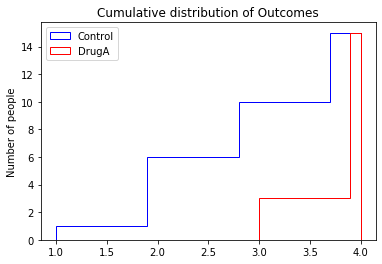

In [56]:
plt.hist(control, cumulative=True, histtype='step', color='blue', label='Control')
plt.hist(drugA, cumulative=True, histtype='step', color='red', label='DrugA')
plt.title('Cumulative distribution of Outcomes')
plt.ylabel('Number of people')
plt.legend(loc='upper left')
plt.show()


Want to not just treat this as a categorical variable, but treat it as ordinal.


6) How would you test if the drug is improving clinical ratings? 

Statistical test to see if drug is improving.

Wilcoxon Mann (rank sum) test. Using Mann Whitney because it's ordinal, but not continuous.

In [58]:
from scipy.stats import mannwhitneyu
mannwhitneyu(control,drugA)

MannwhitneyuResult(statistic=51.0, pvalue=0.0023562366023740576)

7) Suppose there were two drugs that we wanted to test and see if it improved clinical ratings. Given that the ratings are not parametric, we can't run a standard one-way ANOVA. What could you do instead? 

In [59]:
np.random.seed(5)
drugB = np.array([*map(lambda x: int(np.round(x, decimals=0) + 1 if x <= 3 else 4), np.random.lognormal(mean=2, sigma=1,size=15))])

In [60]:
drugB

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 2])

In [63]:
from scipy.stats import kruskal
kruskal(control, drugA, drugB)

KruskalResult(statistic=12.64031800113571, pvalue=0.0017996573369421353)